<a href="https://colab.research.google.com/github/mohankrishna12/Pulse_BirdSoundRecognition/blob/main/BirdClef__2023_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Project of **DA623** at *IITG (2023 Jan-May Semester)*

Team Name : **Pulse**

Members:
Pallapu Mohan Krishna,Shania H,Avantika Sahu

In [2]:
#to upload kaggle token  api json file
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pmohankrishna","key":"d025db3a899ebbdfae8e68b44491849b"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Apr 29 18:53 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
#change the directory to our working location
%cd /content/drive/MyDrive/BirdClef2023

/content/drive/MyDrive/BirdClef2023


In [9]:
#list out the datasets 
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           5525        136  1.0              
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25          11332        397  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           5791        115  1.0              
evangower/premier-league-2022-2023                             Pr

In [13]:
#download the birdclef@2023 dataset in our local machine
! kaggle competitions download -c 'birdclef-2023'


#--below is to search datasets using keyword
#!kaggle datasets list -s birdclef-2023

100% 4.90G/4.91G [00:41<00:00, 71.8MB/s]
100% 4.91G/4.91G [00:42<00:00, 125MB/s] 


In [14]:
#Unzip the dataset
!unzip birdclef-2023.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_audio/rerswa1/XC330925.ogg  
  inflating: train_audio/rerswa1/XC331732.ogg  
  inflating: train_audio/rerswa1/XC333007.ogg  
  inflating: train_audio/rerswa1/XC333008.ogg  
  inflating: train_audio/rerswa1/XC333855.ogg  
  inflating: train_audio/rerswa1/XC334159.ogg  
  inflating: train_audio/rerswa1/XC334160.ogg  
  inflating: train_audio/rerswa1/XC334161.ogg  
  inflating: train_audio/rerswa1/XC370598.ogg  
  inflating: train_audio/rerswa1/XC371021.ogg  
  inflating: train_audio/rerswa1/XC371367.ogg  
  inflating: train_audio/rerswa1/XC376096.ogg  
  inflating: train_audio/rerswa1/XC379520.ogg  
  inflating: train_audio/rerswa1/XC381917.ogg  
  inflating: train_audio/rerswa1/XC382091.ogg  
  inflating: train_audio/rerswa1/XC383377.ogg  
  inflating: train_audio/rerswa1/XC383401.ogg  
  inflating: train_audio/rerswa1/XC384434.ogg  
  inflating: train_audio/rerswa1/XC385379.ogg  
  inflating: train_audio/rerswa1/XC39

In [15]:
import numpy as np # linear algebra
import pandas as pd #dataframes

In [16]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BirdClef2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC330426.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC330427.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC330925.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC331732.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC333007.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC333008.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC333855.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC334159.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC334160.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC334161.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC370598.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC371021.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rerswa1/XC371367.ogg
/content/drive/MyDrive/BirdClef2023/train_audio/rers

In [17]:
import os
import random
import cv2
import librosa
import folium

import pandas as pd
import numpy as np
from scipy.linalg import norm

from IPython.display import Audio, display
from scipy.stats import zscore

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Audio
import altair as alt

In [18]:
# defining some helper functions
def normalize(v):
    if norm(v) == 0:
        return v
    return norm(v)

In [19]:
tr_meta_df = pd.read_csv("/content/drive/MyDrive/BirdClef2023/train_metadata.csv")


In [20]:
tr_meta_df.shape


(16941, 12)

In [21]:
tr_meta_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16941 entries, 0 to 16940
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     16941 non-null  object 
 1   secondary_labels  16941 non-null  object 
 2   type              16941 non-null  object 
 3   latitude          16714 non-null  float64
 4   longitude         16714 non-null  float64
 5   scientific_name   16941 non-null  object 
 6   common_name       16941 non-null  object 
 7   author            16941 non-null  object 
 8   license           16941 non-null  object 
 9   rating            16941 non-null  float64
 10  url               16941 non-null  object 
 11  filename          16941 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.6+ MB


In [22]:
tr_meta_df.head(3)


primary_label secondary_labels      type  latitude  longitude  \
0       abethr1               []  ['song']    4.3906    38.2788   
1       abethr1               []  ['call']   -2.9524    38.2921   
2       abethr1               []  ['song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2  Creative Commons Attribution-NonCommercial-Sha...     3.5   

                                 url              filename  
0  https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1  https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2  https://www.xeno-canto.org/363502  abethr1/XC363502.ogg

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Calculate percentage of empty values in each column
empty_pct = (tr_meta_df.isnull().sum() / len(tr_meta_df)) * 100

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=empty_pct.index,  # x-axis values
    y=empty_pct.values,  # y-axis values
    text=empty_pct.round(2).astype(str) + '%',  # text label with percentage
    textposition='auto',  # position of the text label
    marker=dict(color='green')  # set the color of the bar to green
)])

# Update the layout of the chart
fig.update_layout(
    title='Percentage of Empty Values in tr_meta_df',
    xaxis=dict(title='Columns'),
    yaxis=dict(title='Percentage of Empty Values')
)

# Display the chart
fig.show()

In [24]:
print(tr_meta_df['primary_label'].describe())
print(tr_meta_df['primary_label'].unique())

count      16941
unique       264
top       barswa
freq         500
Name: primary_label, dtype: object
['abethr1' 'abhori1' 'abythr1' 'afbfly1' 'afdfly1' 'afecuc1' 'affeag1'
 'afgfly1' 'afghor1' 'afmdov1' 'afpfly1' 'afpkin1' 'afpwag1' 'afrgos1'
 'afrgrp1' 'afrjac1' 'afrthr1' 'amesun2' 'augbuz1' 'bagwea1' 'barswa'
 'bawhor2' 'bawman1' 'bcbeat1' 'beasun2' 'bkctch1' 'bkfruw1' 'blacra1'
 'blacuc1' 'blakit1' 'blaplo1' 'blbpuf2' 'blcapa2' 'blfbus1' 'blhgon1'
 'blhher1' 'blksaw1' 'blnmou1' 'blnwea1' 'bltapa1' 'bltbar1' 'bltori1'
 'blwlap1' 'brcale1' 'brcsta1' 'brctch1' 'brcwea1' 'brican1' 'brobab1'
 'broman1' 'brosun1' 'brrwhe3' 'brtcha1' 'brubru1' 'brwwar1' 'bswdov1'
 'btweye2' 'bubwar2' 'butapa1' 'cabgre1' 'carcha1' 'carwoo1' 'categr'
 'ccbeat1' 'chespa1' 'chewea1' 'chibat1' 'chtapa3' 'chucis1' 'cibwar1'
 'cohmar1' 'colsun2' 'combul2' 'combuz1' 'comsan' 'crefra2' 'crheag1'
 'crohor1' 'darbar1' 'darter3' 'didcuc1' 'dotbar1' 'dutdov1' 'easmog1'
 'eaywag1' 'edcsun3' 'egygoo' 'equaka1' 'eswdov1

In [25]:
def plot_distribution(df, column, nbins=50):
    ordered_values = df[column].value_counts().index.tolist()
    fig = px.histogram(df, x=column, nbins=nbins,
                       color_discrete_sequence=['green'])
    fig.update_layout(template='plotly_white',
                      title=f'Distribution of {column}',
                      xaxis_title=column.capitalize(),
                      yaxis_title='Count')
    fig.update_xaxes(type='category', categoryorder='array', categoryarray=ordered_values)
    fig.show()

In [26]:
def plot_distribution2(df, column, nbins=50):
    fig = px.histogram(df, x=column, nbins=nbins,
                       color_discrete_sequence=['green'])
    fig.update_layout(template='plotly_white',
                      title=f'Distribution of {column}',
                      xaxis_title=column.capitalize(),
                      yaxis_title='Count')
    fig.update_xaxes(type='category', categoryorder='array')
    fig.show()

In [27]:
plot_distribution(tr_meta_df,'primary_label')


In [28]:
# print(tr_meta_df['secondary_labels'].value_counts())

plot_distribution(tr_meta_df,'secondary_labels')

# removing the first one and then printing again

tr_meta_df_filtered = tr_meta_df.loc[tr_meta_df['secondary_labels'].apply(len) > 2]

# Call the plot_distribution function
print("distribution of secondary_labels modified with removal of []")
plot_distribution(tr_meta_df_filtered, 'secondary_labels')

distribution of secondary_labels modified with removal of []


In [29]:
tr_meta_df["type"].head()


0            ['song']
1            ['call']
2            ['song']
3            ['song']
4    ['call', 'song']
Name: type, dtype: object

In [31]:
import ast
# Flatten the list of labels in the "type" column
labels = [label.strip("[]'") for sublist in tr_meta_df['type'].apply(ast.literal_eval) for label in sublist]

# Count the occurrence of each label
label_counts = Counter(labels)

# Select the top 10 labels
top_labels = dict(sorted(label_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Create a bar plot of the top 10 label counts
fig = px.bar(x=list(top_labels.keys()), y=list(top_labels.values()), color_discrete_sequence=['green'])
fig.update_layout(title_text="Top 10 Types by Count")
fig.show()

In [32]:
fig = px.density_mapbox(tr_meta_df, lat='latitude', lon='longitude',
                        radius=2, center=dict(lat=0, lon=180),
                        zoom=1, mapbox_style="stamen-terrain", color_continuous_scale='greens')

# set plot title
fig.update_layout(title='Heatmap')

# show the plot
fig.show()

In [33]:
plot_distribution(tr_meta_df, 'author')


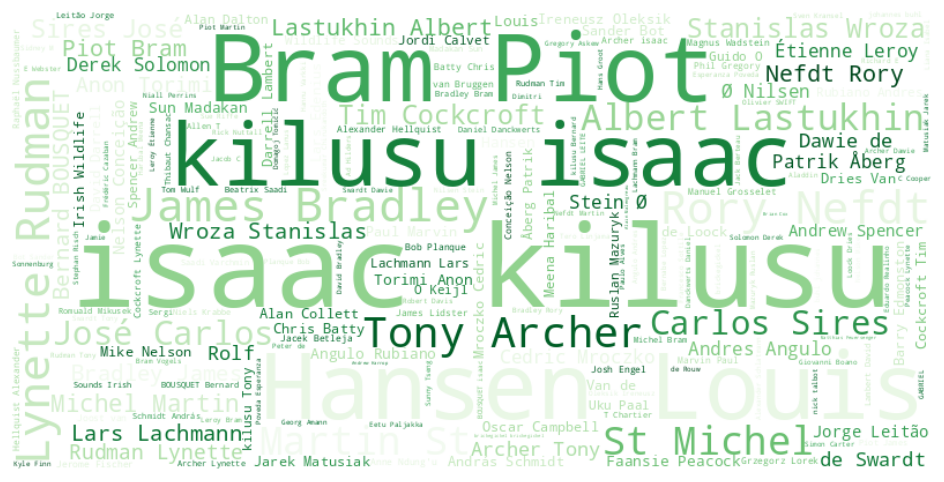

In [34]:
# Define your text to visualize
from wordcloud import WordCloud

# Create the WordCloud object with a green color
text = ' '.join(tr_meta_df['author'].astype(str).values.tolist())
wc = WordCloud(background_color='white', width=800, height=400, colormap='Greens').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
plot_distribution(tr_meta_df, 'common_name')


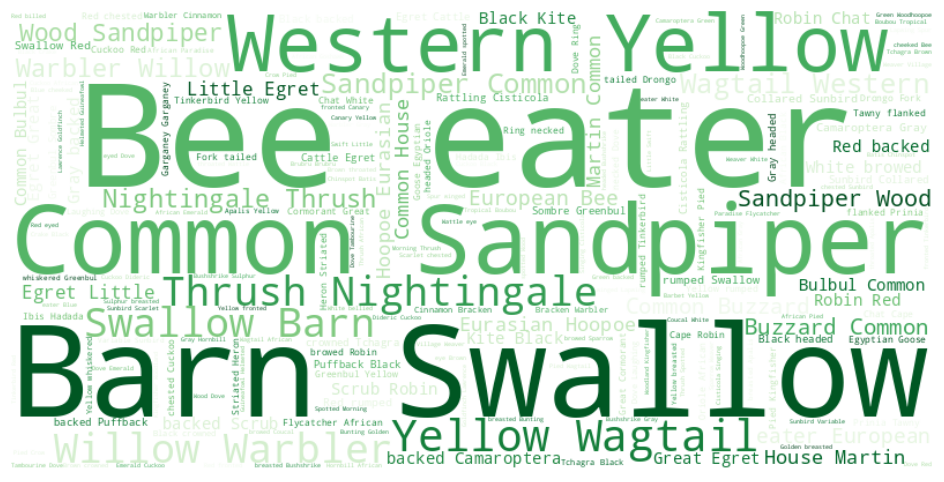

In [36]:
# Define your text to visualize
from wordcloud import WordCloud

# Create the WordCloud object with a green color
text = ' '.join(tr_meta_df['common_name'].astype(str).values.tolist())
wc = WordCloud(background_color='white', width=800, height=400, colormap='Greens').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
plot_distribution(tr_meta_df, 'license')


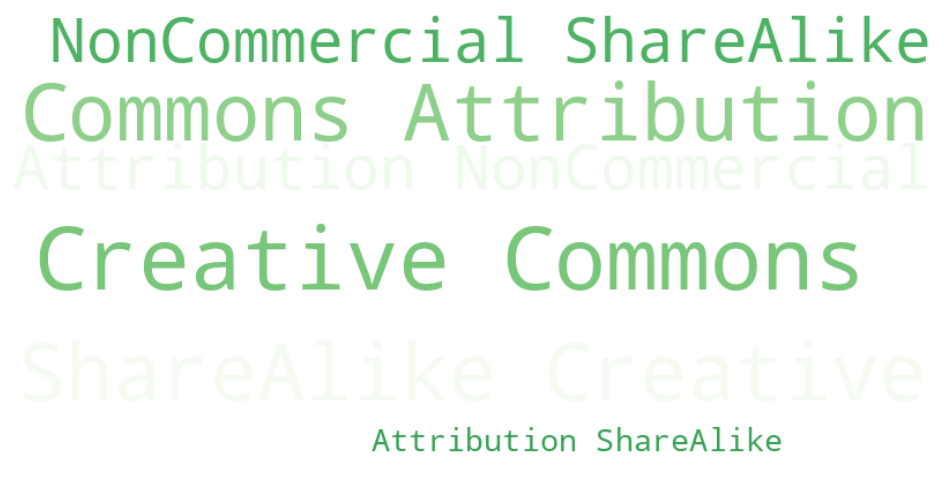

In [38]:
# Define your text to visualize
from wordcloud import WordCloud

# Create the WordCloud object with a green color
text = ' '.join(tr_meta_df['license'].astype(str).values.tolist())
wc = WordCloud(background_color='white', width=800, height=400, colormap='Greens').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
plot_distribution2(tr_meta_df,'rating')


In [40]:
def create_boxplot(df, y_col, title):
    fig = px.box(df, y=y_col)
    fig.update_traces(marker_color='green')
    fig.update_layout(title=title)
    fig.show()

In [41]:
create_boxplot(tr_meta_df,'rating','Box Plot for Ratings')


In [42]:
fig = px.histogram(tr_meta_df, x="rating", nbins=len(tr_meta_df["rating"].unique()) , color_discrete_sequence=['green'])
fig.update_layout(title_text="Distribution of Ratings")
fig.show()

**References**:

https://www.kaggle.com/competitions/birdclef-2023/data